![image-3.png](https://github.com/cafawo/Derivatives/blob/main/figures/fscampus_small.png?raw=1)

# Derivatives

[**Prof. Dr. Fabian Woebbeking**](https://woebbeking.info/)</br>
Assistant Professor of Financial Economics</br>

## Case 2: Forward and hedging

### Part 1

#### Task: Evaluate a Forward with a maturity of half a year on a share with no dividend. The price is 60 with an exercise price of 55 the continuous rate is 4%.

In [1]:
# Your code
import numpy as np

def forward_mtm(strike, spot, maturity, rate, income=0, storage=0, convenience=0):
    return spot * np.exp((- income + storage - convenience) * maturity) - strike * np.exp(- rate * maturity)

def forward_price(spot, maturity, rate, income=0, storage=0, convenience=0):
    return spot * np.exp((rate - income + storage - convenience) * maturity)

print(f'forward_mtm(55, 60, 1/2, 0.04) =  {forward_mtm(55, 60, 1/2, 0.04):.2f}')

forward_mtm(55, 60, 1/2, 0.04) =  6.09


#### Task: Evaluate a 1 year forward with exercise price 910 on a share with a spot price of 900 and dividend payment of 60 in 6 months and in 12 months. The continuous six month rate is 9% the one year continuous rate is 10%.

In [2]:
# Your code

pv_div = 60 * np.exp(- 0.09 * 0.5) + 60 * np.exp(- 0.10 * 1)
print(f"PV of dividends = {pv_div:,.2f}")

mtm_fwd = 900 - pv_div - 910 * np.exp(- 0.10 * 1)
print(f"MTM forward f() = {mtm_fwd:,.2f}")

PV of dividends = 111.65
MTM forward f() = -35.05


#### Evaluate a six month forward with strike 27 on a share with spot price 25 and a continuous dividend yield of 4%. The six month continuous rate is 10%. Also calculate the forward price.

In [3]:
# Your code
print(f'forward_mtm(27, 25, 6/12, 0.1, 0.04) = {forward_mtm(27, 25, 6/12, 0.1, 0.04):.2f}')
print(f'forward_price(25, 6/12, 0.1, 0.04)   = {forward_price(25, 6/12, 0.1, 0.04):.2f}')

forward_mtm(27, 25, 6/12, 0.1, 0.04) = -1.18
forward_price(25, 6/12, 0.1, 0.04)   = 25.76


#### Task: Analyze a one year forward on a share (no dividends) with a spot price of 40. The continuous rate is 10%.

1. 	Calculate the forward price and the value of the contract at the start. 

2. 	Six months later is the spot price 45. Calculate the new forward price and the value of the old contract.


In [4]:
# Your code
print("A:")
F_0 = forward_price(40, 1, 0.1)
print(f'Forward price = {F_0:.2f}')
f_0 = forward_mtm(F_0, 40, 1, 0.1)
print(f'Market value  = {f_0:.2f}')

print("B:")
F_1 = forward_price(45, 6/12, 0.1)
print(f'Forward price = {F_1:.2f}')
f_1 = forward_mtm(F_0, 45, 6/12, 0.1)
print(f'Market value  = {f_1:.2f}')
print(f"Market value  = {(F_1-F_0) * np.exp(-0.1*0.5):,.2f} (alternative calculation)")


A:
Forward price = 44.21
Market value  = 0.00
B:
Forward price = 47.31
Market value  = 2.95
Market value  = 2.95 (alternative calculation)


#### Task: Explain the cost of carry and convenience yield.

* carry: financing, storage, transportation, insurance 
* convenience yield: advantage of physical possession 

### Part 2

This part is concerned with hedging. For the number crunching we use NumPy:

> NumPy is the fundamental package for scientific computing with Python. ([see NumPy documentation](https://numpy.org/))

For the data wrangling we use Pandas:

> Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. ([see pandas documentation](https://pandas.pydata.org/docs/index.html))

In [5]:
import pandas as pd

# Load some data into a data frame (df) that we call ohlc
ohlc = pd.read_csv('https://github.com/cafawo/Derivatives/blob/main/cases/2_forwards_data.csv?raw=1', index_col=0, parse_dates=True)


# Arithmetic returns
ohlc['ret_BTC'] = ohlc['close_BTC'] / ohlc['close_BTC'].shift(1) - 1
ohlc['ret_ETH'] = ohlc['close_ETH'] / ohlc['close_ETH'].shift(1) - 1
# Log returns
ohlc['logret_BTC'] = np.log(ohlc['close_BTC']) - np.log(ohlc['close_BTC'].shift(1))
ohlc['logret_ETH'] = np.log(ohlc['close_ETH']) - np.log(ohlc['close_ETH'].shift(1))

# Show the first 5 values in our data frame
display(ohlc.head(5))
# There are naturally NaNs from the return calculations, which we remove
ohlc.dropna(inplace=True)

,volume_BTC,open_BTC,low_BTC,high_BTC,close_BTC,volume_ETH,open_ETH,low_ETH,high_ETH,close_ETH,ret_BTC,ret_ETH,logret_BTC,logret_ETH
2023-01-01,2775.514873,16519.0,16497.0,16771.5,16714.0,30710.64956,1194.30,1192.55,1220.05,1212.45,NaN,NaN,NaN,NaN
2023-01-02,4196.490738,16714.0,16646.5,16788.5,16730.5,62574.24303,1212.75,1211.60,1223.20,1216.55,0.000987,0.003382,0.000987,0.003376
2023-01-03,5270.260175,16730.0,16603.5,16903.0,16876.0,93092.93577,1216.55,1204.65,1255.60,1252.60,0.008697,0.029633,0.008659,0.029202
2023-01-04,5571.352194,16875.5,16759.5,16988.0,16820.5,70631.16868,1252.65,1243.45,1271.95,1251.25,-0.003289,-0.001078,-0.003294,-0.001078
2023-01-05,5572.717440,16820.5,16752.5,16873.0,16783.0,63309.29345,1251.20,1240.45,1258.00,1247.80,-0.002229,-0.002757,-0.002232,-0.002761


<AxesSubplot:>

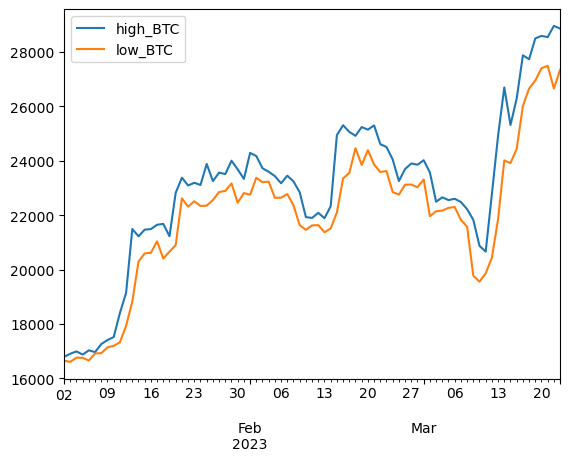

In [6]:
# You can access specific column(s) in the df
ohlc[['high_BTC', 'low_BTC']].plot()

In [7]:
import numpy as np

# Mean
btc_mu = np.mean(ohlc['ret_BTC'])
print(f"BTC daily mu:  {btc_mu * 100:,.4f}%")
# Standard deviation
btc_std = np.std(ohlc['ret_BTC'])
print(f"BTC daily vol: {btc_std * 100:,.4f}%")

BTC daily mu:  0.7044%
BTC daily vol: 3.2046%


#### Task: Use the data in `ohlc` to calculate the a hedge ratio between the two assets.

In [8]:
# Hint: adopt the code from above, you can also find relevant calculations in derivatives.ipynb

# Your code
btc_std = np.std(ohlc['ret_BTC'])
print(f"BTC std      = {btc_std:.4f}")
eth_std = np.std(ohlc['ret_ETH'])
print(f"ETH std      = {eth_std:.4f}")
#rho = np.corrcoef(ohlc['ret_close_ETH'],ohlc['ret_close_BTC'])[0][1]  # Numpy
rho = ohlc[['ret_ETH','ret_BTC']].corr().iloc[0,1]  # Pandas
print(f"BTC/ETH corr = {rho:.4f}")

hedge_ratio = rho * btc_std / eth_std
print(f"Hedge ratio  = {hedge_ratio:.4f}")

BTC std      = 0.0320
ETH std      = 0.0311
BTC/ETH corr = 0.9098
Hedge ratio  = 0.9384


#### Task: Explain and interpret your results (plots always help).

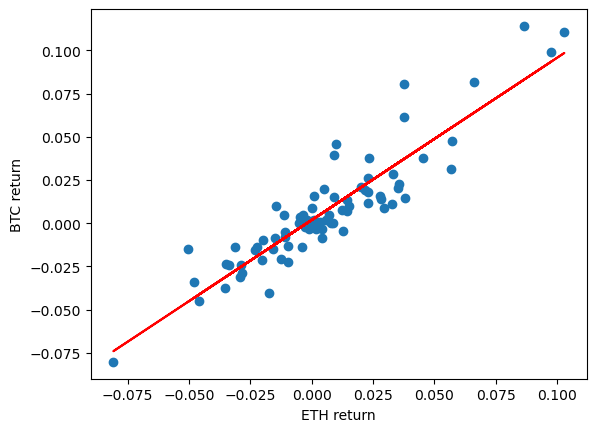

In [9]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Fit a linear regression
constant, beta = polyfit(ohlc['ret_ETH'], ohlc['ret_BTC'], 1)

plt.figure('mvhegde')
plt.xlabel('ETH return')
plt.ylabel('BTC return')
# Plot observations
plt.scatter(ohlc['ret_ETH'], ohlc['ret_BTC'])
# Plot regression line
plt.plot(ohlc['ret_ETH'], constant + beta * ohlc['ret_ETH'], 'r-')
plt.show()